In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


In [63]:
df = pd.read_csv("vote_clean_2014.csv")
df.dropna(inplace=True)
df

,Text,Datetime,Location,Hashtags,polarity,subjectivity
0,whitecapital runs anc even uses courts decides...,14:12:31 18:26:03,South Africa,"['WhiteCapital', 'ANC', 'SA', 'VoteEFF']",0.000000,0.000000
1,matricresults u past beetifel black joef make ...,14:12:30 22:27:51,Vereeniging,"['MatricResults', 'ANC', 'Zuma']",-0.138889,0.227778
2,next generation mampara voters anc education p...,14:12:30 06:46:43,South Africa,"['Mampara', 'ANC']",0.000000,0.000000
3,anc imagine nr1 b praised even aft voted mampa...,14:12:29 12:04:56,Pretoria,['ANC'],0.000000,0.000000
4,clear anc policy oversee education system main...,14:12:29 06:43:19,South Africa,['ANC'],0.144444,0.405556
...,...,...,...,...,...,...
1386,dagang effifpanc election2014 ivotesa uhamba n...,14:01:28 08:33:12,johannesburg,"['DAgang', 'EFF', 'IFP', 'ANC', 'Election2014'...",0.000000,0.000000
1387,eff ifp voteeff2014,14:01:20 17:09:32,"Sebokeng,South Africa","['EFF', 'IFP', 'VoteEFF2014']",0.000000,0.000000
1388,vote year ancto corrupt da da da efffighting r...,14:01:20 01:42:42,"Midrand, South Africa","['ANC', 'DA', 'EFF', 'IFP']",-0.500000,1.000000
1389,elections together bring changes elections vuk...,14:01:17 17:54:03,"Boksburg, South Africa","['Elections', 'Elections', 'ANC', 'DA', 'EFF',...",0.800000,0.700000


In [64]:
df.shape

(1391, 6)

<AxesSubplot:>

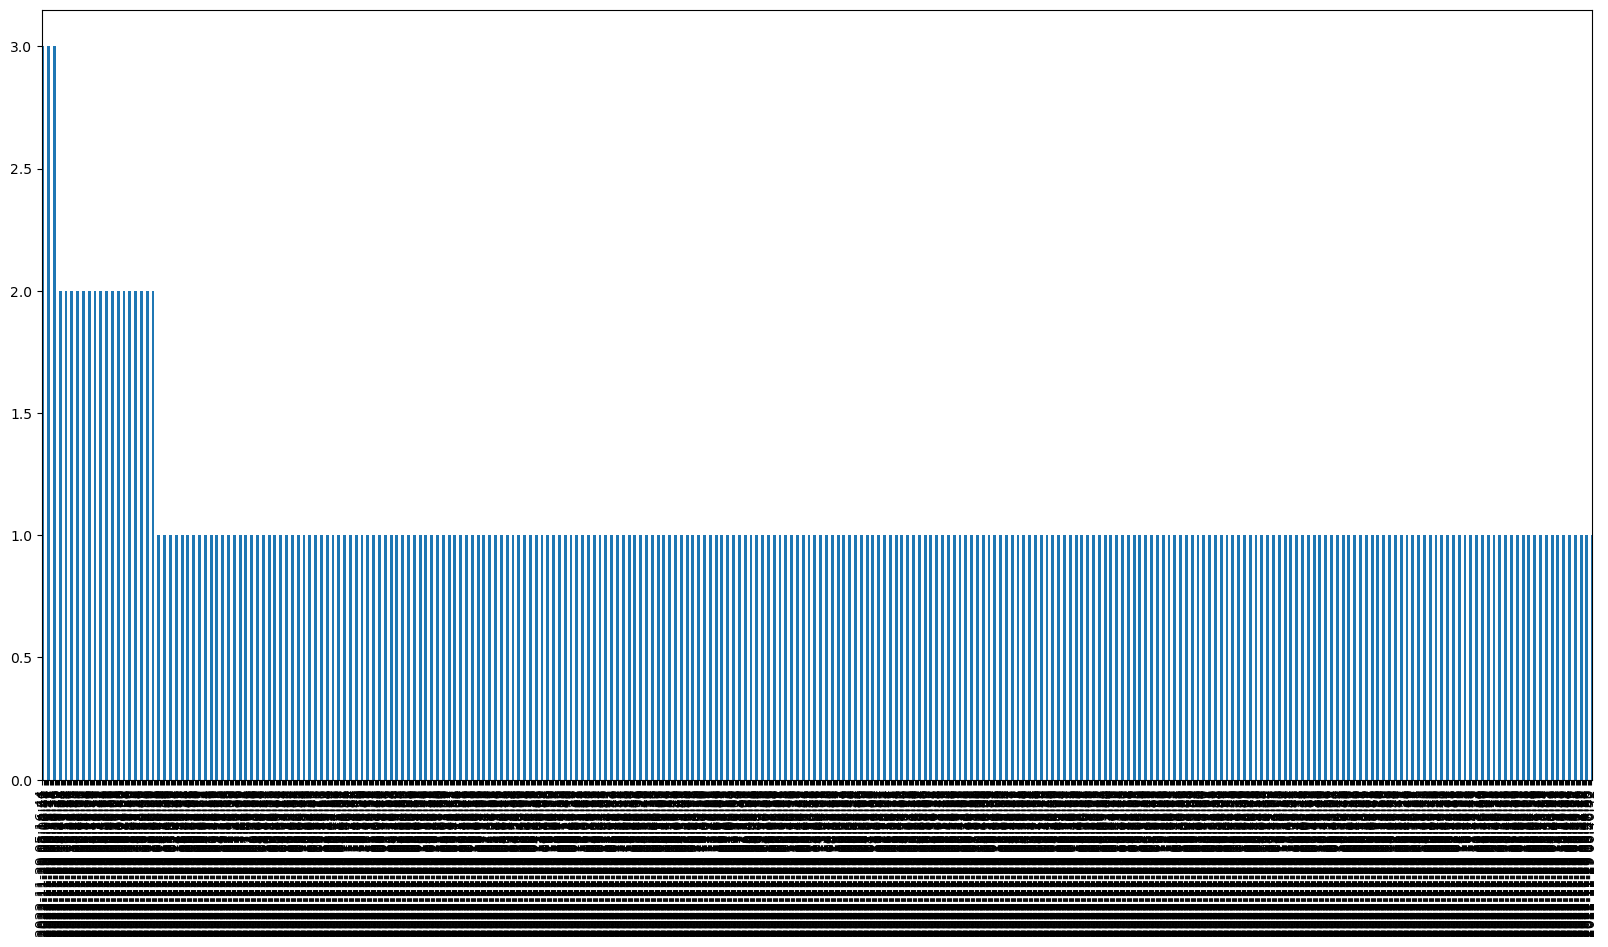

In [65]:
#plot the number of tweets per day
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Datetime'].value_counts().plot(kind='bar', figsize=(20,10))


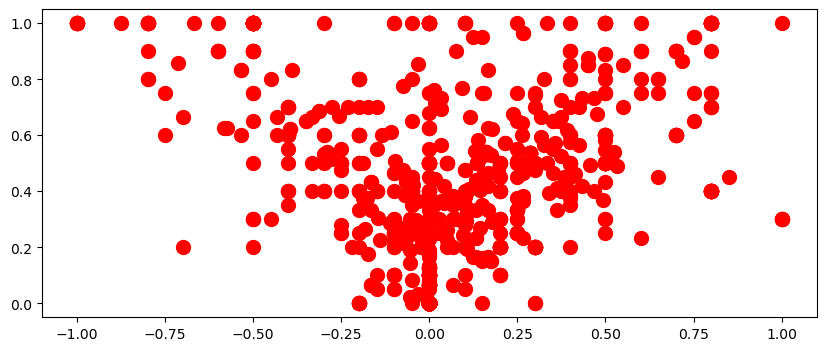

In [66]:
#plot polarity and subjectivity scatter
#increase the size of the plot
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['lines.markersize'] = 10
plt.scatter(df['polarity'], df['subjectivity'], color='red')
plt.show()

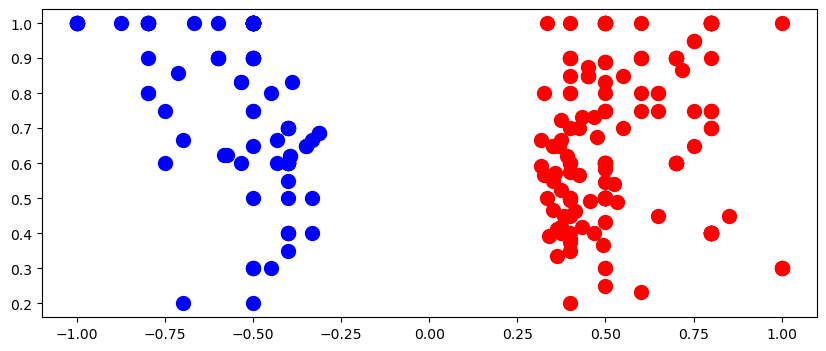

In [67]:
#percentage of positive tweets
ptweets = df[(df.polarity > 0.3)]
ptweets

ntweets = df[(df.polarity < -0.3)]
ntweets

#plot ntweets and ptweets
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['lines.markersize'] = 10
plt.scatter(ptweets['polarity'], ptweets['subjectivity'], color='red')
plt.scatter(ntweets['polarity'], ntweets['subjectivity'], color='blue')
plt.show()


In [68]:
#percentage of positive tweets
ptweetsPercent = df[(df.polarity > 0.15)].shape[0]/df.shape[0]*100
ptweetsPercent

21.063982746225737

In [69]:
#percentage of positive tweets
ntweetsPercent = df[(df.polarity < 0)].shape[0]/df.shape[0]*100
ntweetsPercent

17.038102084831056

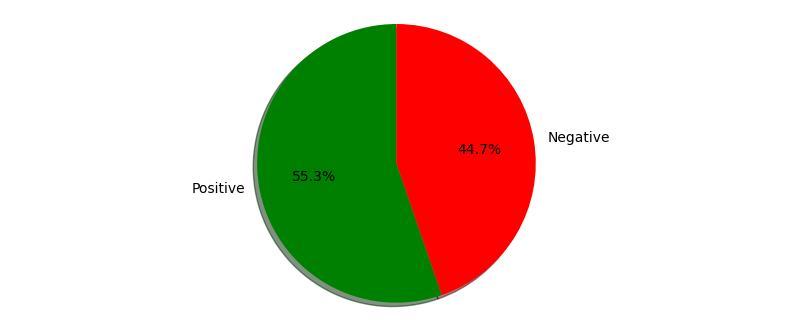

In [70]:
#plot the percentage of positive and negative tweets pie chart
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['lines.markersize'] = 10
plt.pie([ptweetsPercent, ntweetsPercent], labels=['Positive', 'Negative'], colors=['green', 'red'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

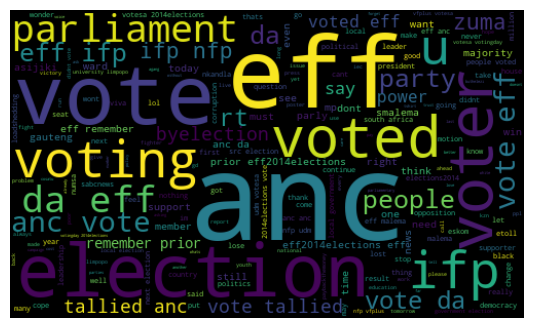

In [71]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
allWords = ' '.join([twts for twts in df['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()